# Housing Price Prediction Model

***By Judah Rashirai***

# Importing The Relevent Libraries


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from scipy.stats import norm

from datetime import datetime


# Column Names

- id - unique identified for a house
- dateDate - house was sold
- pricePrice - is prediction target
- bedroomsNumber - of Bedrooms/House
- bathroomsNumber - of bathrooms/bedrooms
- sqft_livingsquare - footage of the home
- sqft_lotsquare - footage of the lot
- floorsTotal - floors (levels) in house
- waterfront - House which has a view to a waterfront
- view - Has been viewed
- condition - How good the condition is ( Overall )
- grade - overall grade given to the housing unit, based on King County grading system
- sqft_above - square footage of house apart from basement
- sqft_basement - square footage of the basement
- yr_built - Built Year
- yr_renovated - Year when house was renovated
- zipcode - zip
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


# Importing And Cleaning The Data

In [47]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [49]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [50]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [51]:
df['yr_renovated'].fillna(df['yr_renovated'].median())

0           0.0
1        1991.0
2           0.0
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 21597, dtype: float64

In [52]:
df['waterfront'].fillna(df['waterfront'].median())

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    0.0
21596    0.0
Name: waterfront, Length: 21597, dtype: float64

In [53]:
df['view'].fillna(df['view'].median())

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    0.0
21596    0.0
Name: view, Length: 21597, dtype: float64

In [54]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [55]:
df.drop('date', axis=1, inplace=True)

In [56]:
df.drop('sqft_basement', axis=1, inplace=True)

In [57]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503


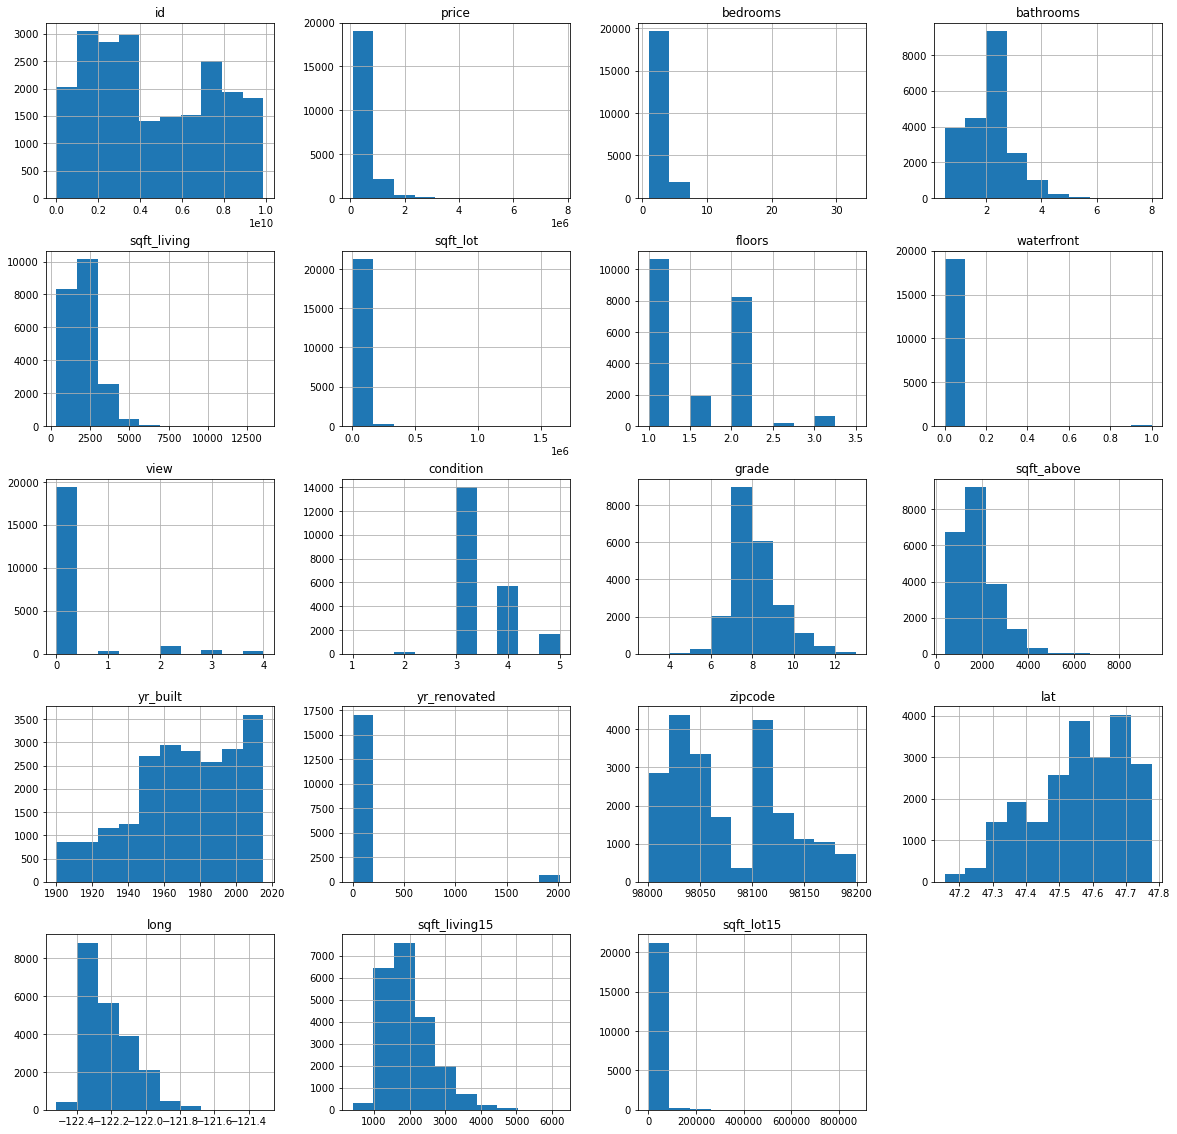

In [58]:
df.hist(figsize = (20,20));

In [59]:
# Defining a function that will create scatter plots and histogram plots
def feat_plots(feature, target,df):
    print(feature)
    
    #Plotting the histogram
    plt.title('{} histogram'.format(feature))
    sns.distplot(df[feature])
    plt.show()
    
    #plotting the scatter plot
    sns.lmplot(x = feature, y = target, data = df, line_kws = {'color' : 'red'})
    plt.title('{} vs {}'.format(target, feature))
    plt.show()
    
    pass

In [60]:
#Feature names to run on th histograms and scatterplots to expose any potential outliers
feat_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                 'condition', 'grade', 'sqft_above', 'yr_built',
                 'sqft_living15', 'long', 'lat']

bedrooms


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


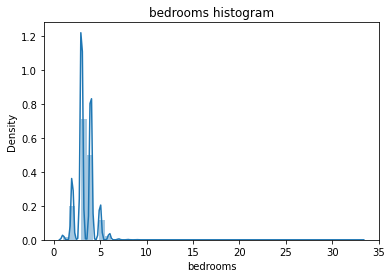

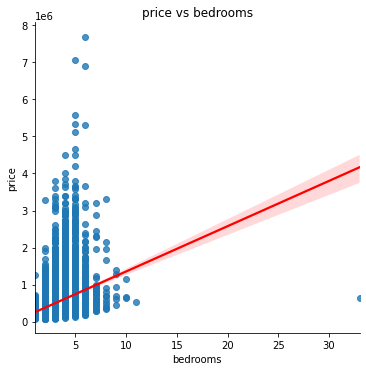

bathrooms


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


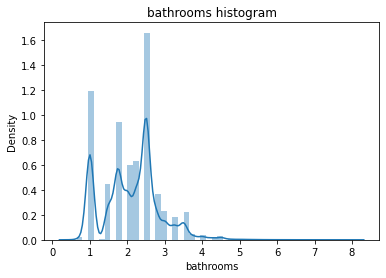

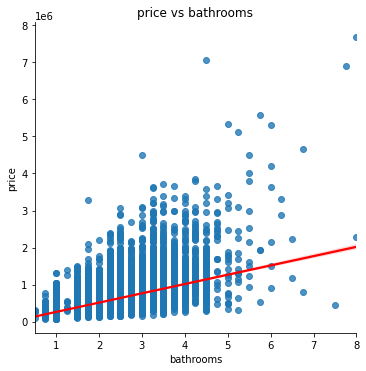

sqft_living


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


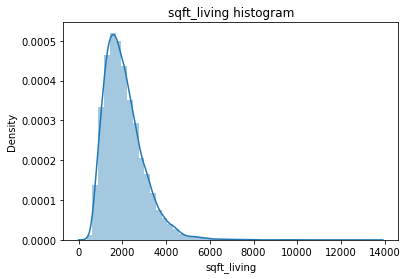

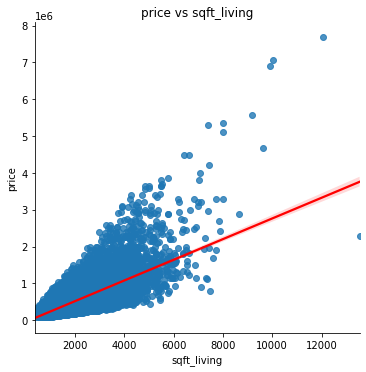

sqft_lot


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


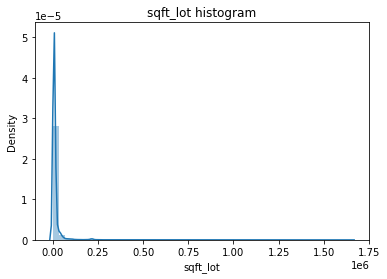

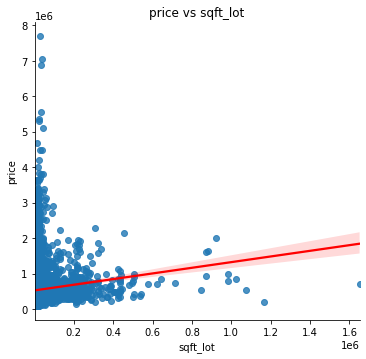

floors


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


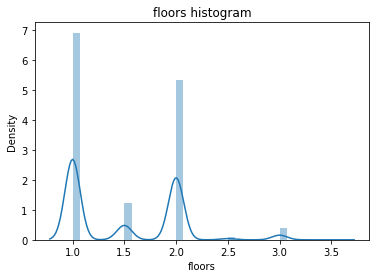

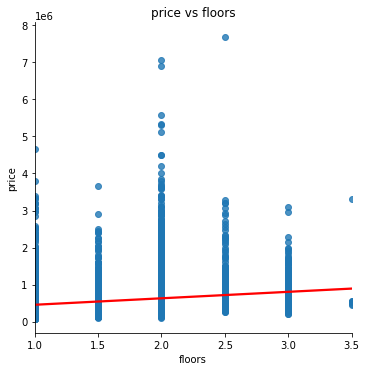

condition


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


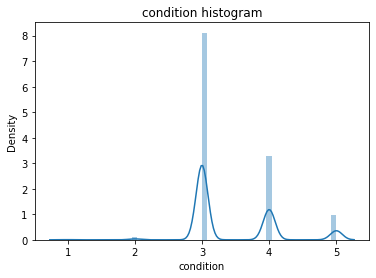

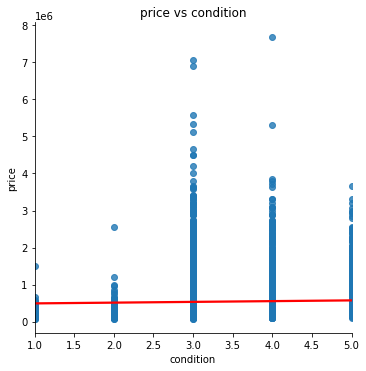

grade


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


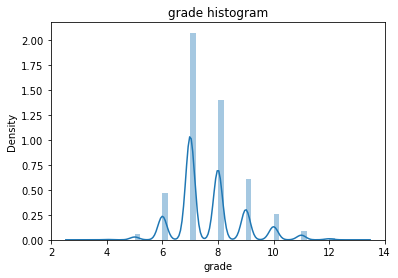

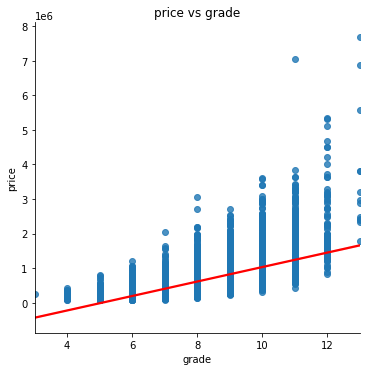

sqft_above


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


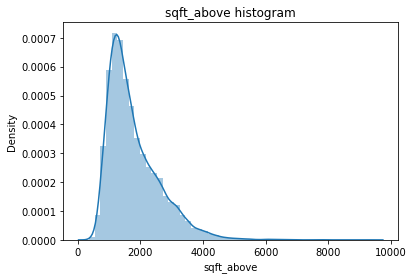

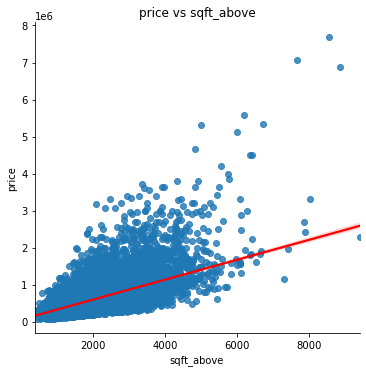

yr_built


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


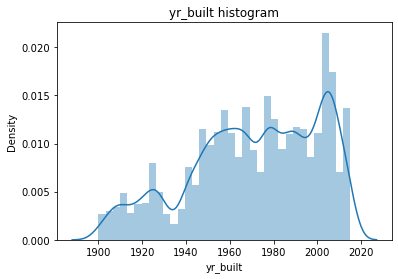

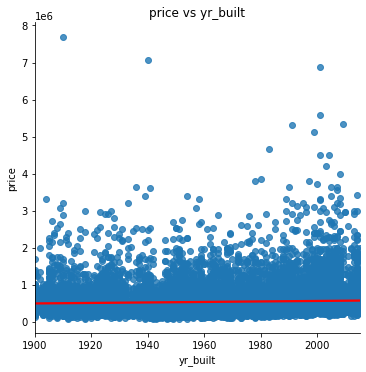

sqft_living15


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


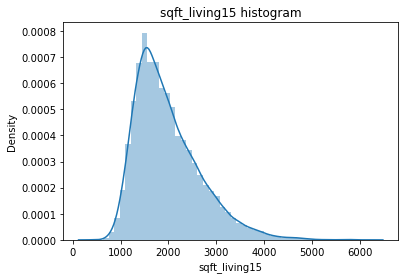

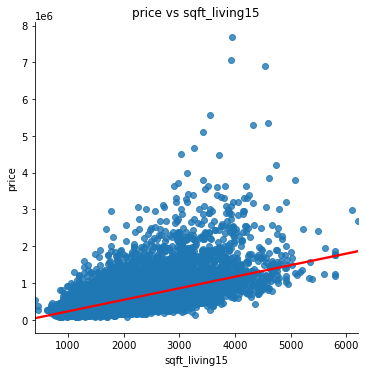

long


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


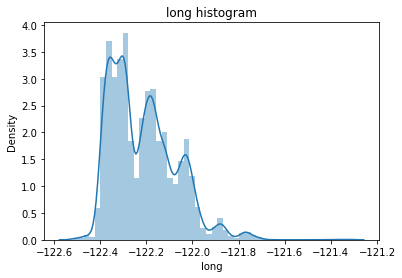

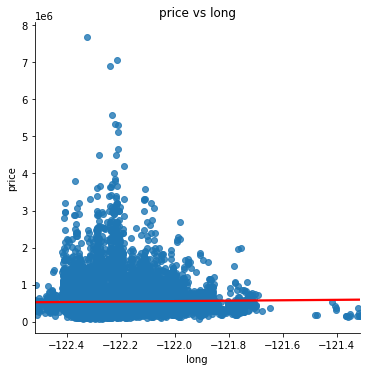

lat


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


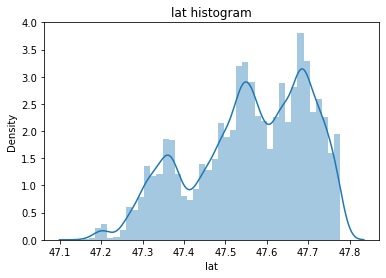

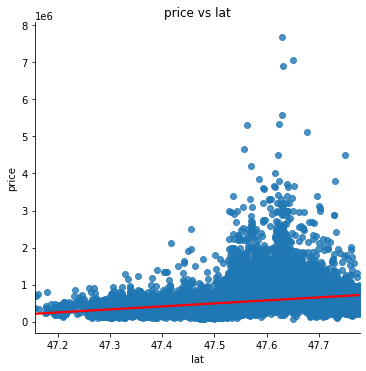

In [61]:
#plot the features in a histogram and scatter with a target
for feature in feat_names:
    feat_plots(feature, 'price', df)

***It is evident that the data above has some outliers that need to be dealt with otherwise they will cause inaccurate modeling resutls. I will deal with the data by removing any ouliers that lie outside of three standard deviations from the mean.***

Below are codes of how you would get rid of outliers that lay outside the 3rd standard deviation. I have not ran the codes as I already have the cleaned data

In [62]:
z = abs(stats.zscore(df))
print(z)

[[0.88603386 0.86671627 0.40290302 ... 0.30569514 0.94367562 0.26062671]
 [0.63741287 0.00625157 0.40290302 ... 0.74628553 0.43288674 0.18769961]
 [0.36536218 0.98077344 1.48249316 ... 0.13514402 1.07029196 0.17219022]
 ...
 [1.06274793 0.37618606 1.48249316 ... 0.6041596  1.41068259 0.39419807]
 [1.49101757 0.38190525 0.40290302 ... 1.03028865 0.84151784 0.42059702]
 [1.06274792 0.58606486 1.48249316 ... 0.6041596  1.41068259 0.41803046]]


In [63]:
threshold = 3
print(np.where(z > 3))

(array([    5,     5,     5, ..., 21574, 21574, 21584], dtype=int64), array([ 3,  4, 17, ...,  4, 17, 11], dtype=int64))


In [64]:
df = df[(z < 3).all(axis=1)]
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


# Importing the Cleaned Dataset

In [4]:
dataset = pd.read_csv('no_outliers_housing.csv')

# Inspecting The Cleaned Dataset

In [86]:
dataset.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
1,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503
2,257500,3,2.25,1715,6819,2.0,0,0,3,7,1715,1995,0,98003,47.3097,-122.327,2238,6819
3,229500,3,1.00,1780,7470,1.0,0,0,3,7,1050,1960,0,98146,47.5123,-122.337,1780,8113
4,323000,3,2.50,1890,6560,2.0,0,0,3,7,1890,2003,0,98038,47.3684,-122.031,2390,7570


In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13676 entries, 0 to 13675
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          13676 non-null  int64  
 1   bedrooms       13676 non-null  int64  
 2   bathrooms      13676 non-null  float64
 3   sqft_living    13676 non-null  int64  
 4   sqft_lot       13676 non-null  int64  
 5   floors         13676 non-null  float64
 6   waterfront     13676 non-null  int64  
 7   view           13676 non-null  int64  
 8   condition      13676 non-null  int64  
 9   grade          13676 non-null  int64  
 10  sqft_above     13676 non-null  int64  
 11  yr_built       13676 non-null  int64  
 12  yr_renovated   13676 non-null  int64  
 13  zipcode        13676 non-null  int64  
 14  lat            13676 non-null  float64
 15  long           13676 non-null  float64
 16  sqft_living15  13676 non-null  int64  
 17  sqft_lot15     13676 non-null  int64  
dtypes: flo

In [88]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.367600e+04,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000,13676.0,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000,13676.0,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000
mean,4.799088e+05,3.332115,2.044074,1956.652969,9882.167520,1.480257,0.0,0.091474,3.425636,7.540582,1695.523837,1971.855075,0.0,98078.000146,47.559307,-122.220268,1913.679219,9128.082261
std,2.271345e+05,0.850488,0.685038,741.116607,11517.300535,0.539088,0.0,0.400052,0.650994,1.022041,701.934926,28.947814,0.0,53.234309,0.140295,0.128675,596.783211,9118.805569
min,8.200000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.0,0.000000,2.000000,5.000000,370.000000,1900.000000,0.0,98001.000000,47.176400,-122.502000,460.000000,659.000000
25%,3.110000e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,0.0,0.000000,3.000000,7.000000,1170.000000,1953.000000,0.0,98033.000000,47.464600,-122.329000,1470.000000,5000.000000
50%,4.325000e+05,3.000000,2.250000,1850.000000,7350.000000,1.000000,0.0,0.000000,3.000000,7.000000,1510.000000,1976.000000,0.0,98065.000000,47.570600,-122.234000,1800.000000,7447.000000
75%,5.976250e+05,4.000000,2.500000,2420.000000,9877.500000,2.000000,0.0,0.000000,4.000000,8.000000,2090.000000,1997.000000,0.0,98117.000000,47.680300,-122.133000,2270.000000,9600.000000
max,1.500000e+06,6.000000,4.250000,4720.000000,137214.000000,3.000000,0.0,2.000000,5.000000,11.000000,4220.000000,2015.000000,0.0,98199.000000,47.777600,-121.797000,4020.000000,95832.000000


In [69]:
len(dataset
)

13676

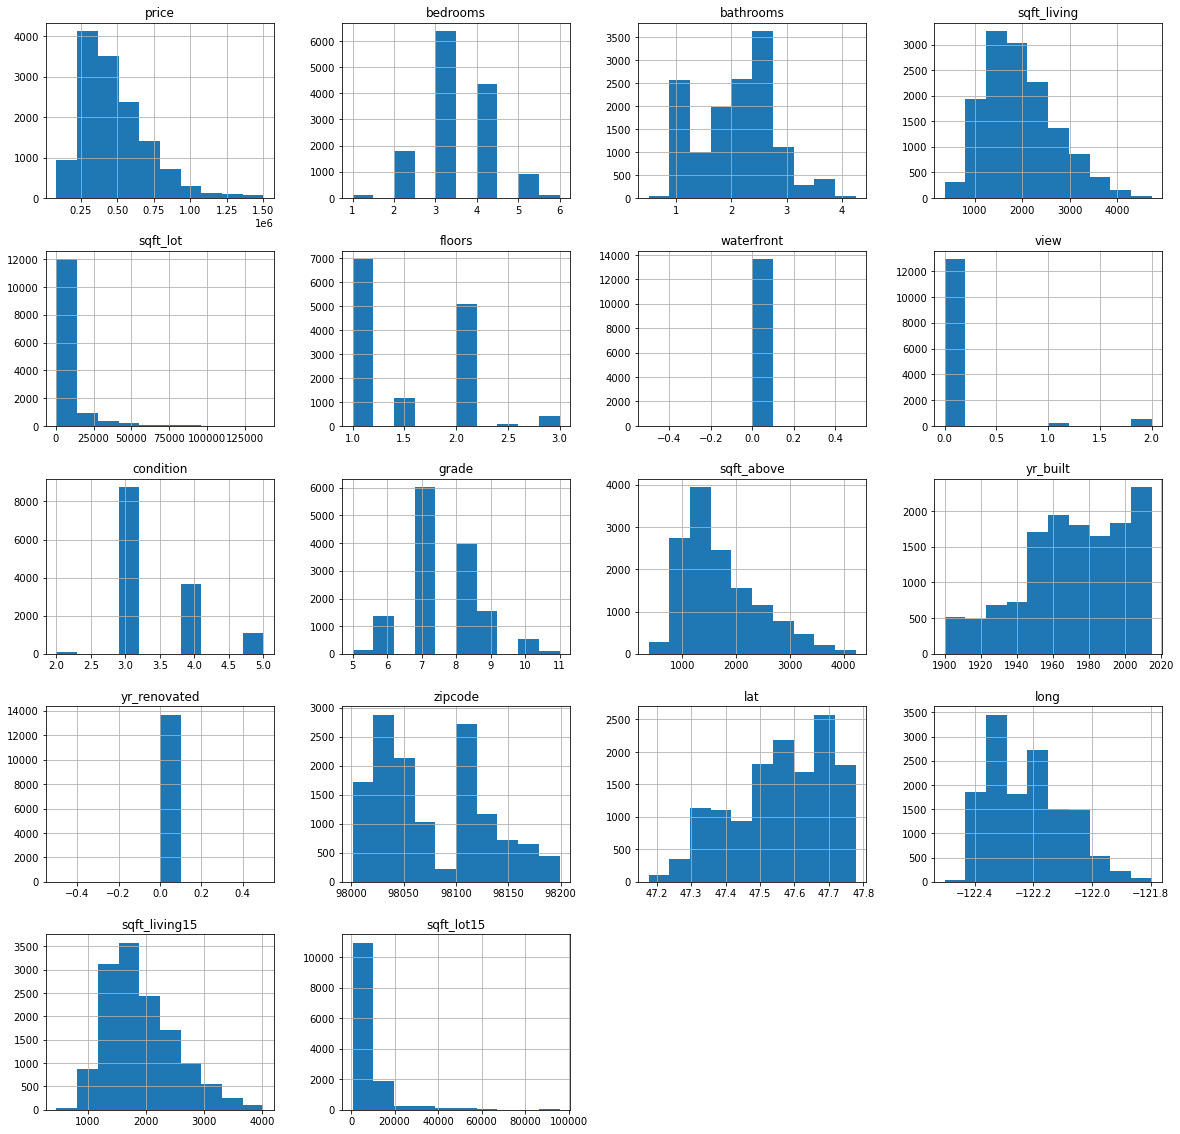

In [70]:
dataset.hist(figsize = (20,20));

In [71]:
# Defining a function that will create scatter plots and histogram plots
def feat_plots(feature, target,dataset):
    print(feature)
    
    #Plotting the histogram
    plt.title('{} histogram'.format(feature))
    sns.distplot(dataset[feature])
    plt.show()
    
    #plotting the scatter plot
    sns.lmplot(x = feature, y = target, data = dataset, line_kws = {'color' : 'red'})
    plt.title('{} vs {}'.format(target, feature))
    plt.show()
    
    pass


In [72]:
#Feature names to run on th histograms and scatterplots to expose any potential outliers
feat_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                 'condition', 'grade', 'sqft_above', 'yr_built',
                 'sqft_living15', 'long', 'lat']

bedrooms


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


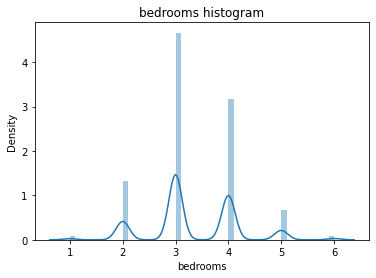

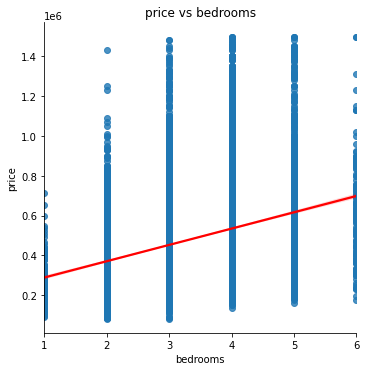

bathrooms


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


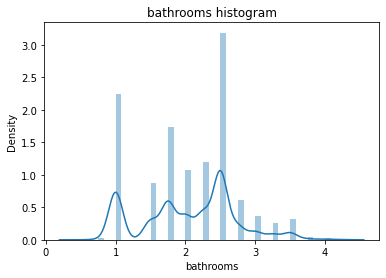

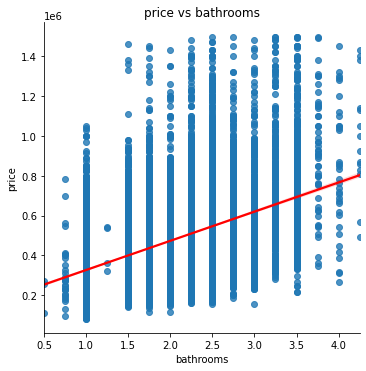

sqft_living


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


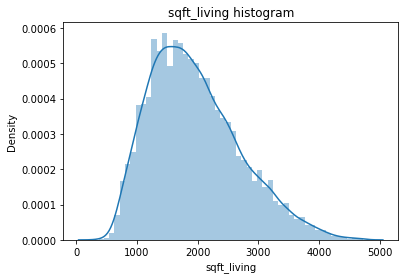

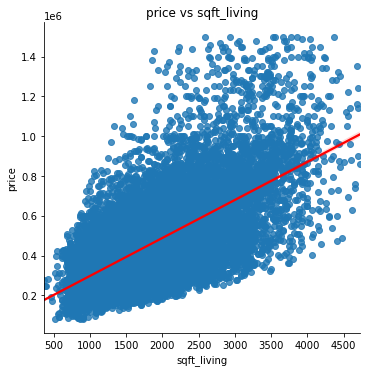

sqft_lot


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


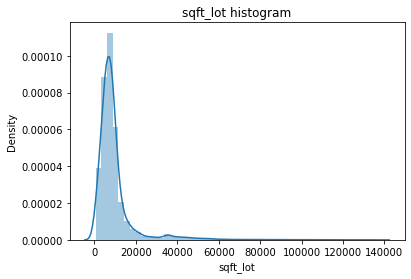

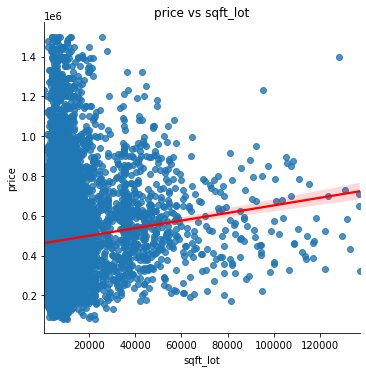

floors


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


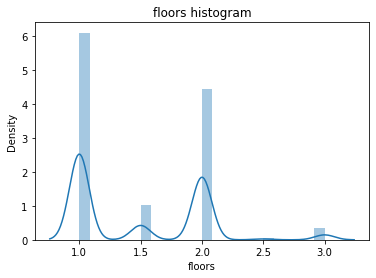

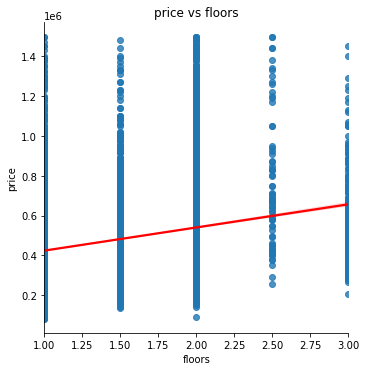

condition


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


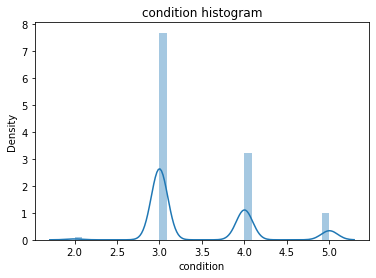

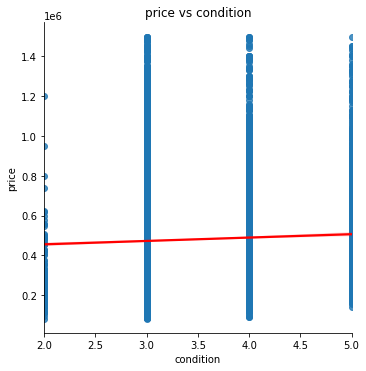

grade


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


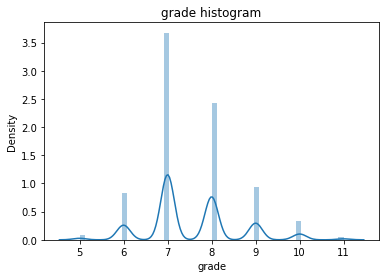

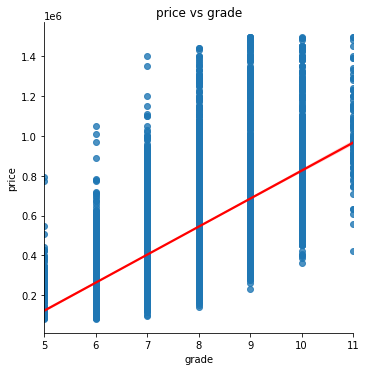

sqft_above


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


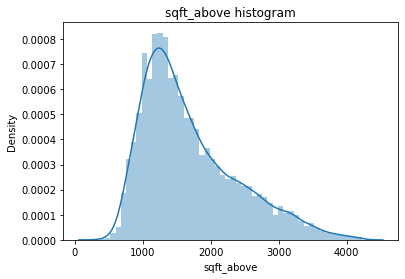

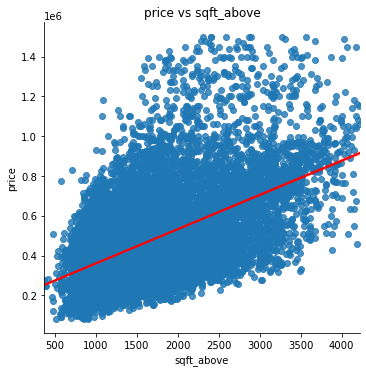

yr_built


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


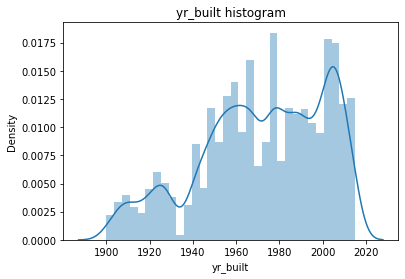

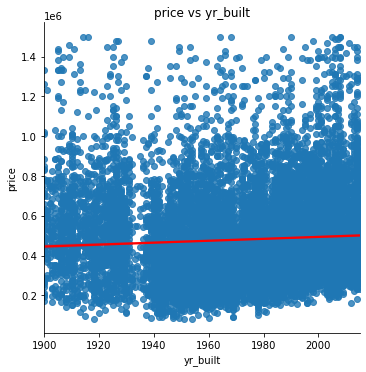

sqft_living15


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


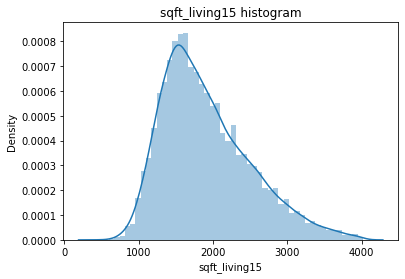

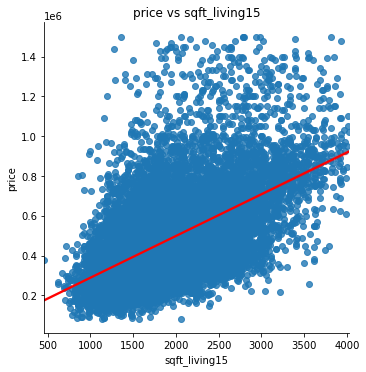

long


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


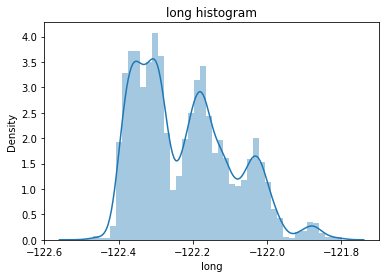

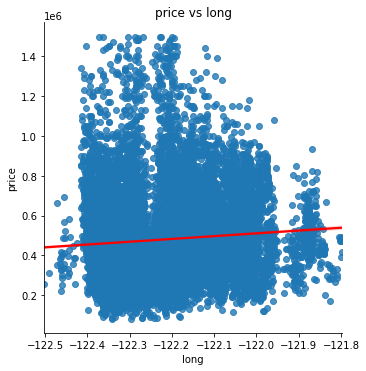

lat


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


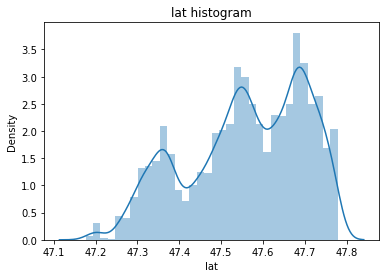

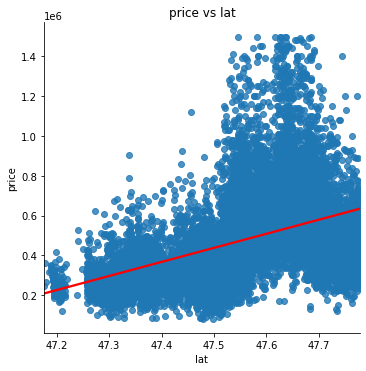

In [73]:
#plot the features in a histogram and scatter with a target
for feature in feat_names:
    feat_plots(feature, 'price', dataset)

***We can now work with this data as the outliers are no longer there as you can see in the histograms above and as a result our results will now be more accurate.***

# Examining Multicollinearity of Features

In [91]:
dataset.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.307001,0.441895,0.623250,0.096700,0.276269,NaN,0.195328,0.048686,0.633551,0.531691,0.061517,NaN,-0.036572,0.436933,0.079537,0.550986,0.088446
bedrooms,0.307001,1.000000,0.490734,0.613918,0.113040,0.158485,NaN,0.046537,0.022025,0.339089,0.484916,0.175407,NaN,-0.172058,-0.040366,0.178371,0.411189,0.116368
bathrooms,0.441895,0.490734,1.000000,0.707666,0.056964,0.514101,NaN,0.064137,-0.146644,0.616924,0.626419,0.583381,NaN,-0.226968,-0.002924,0.285669,0.537826,0.064089
sqft_living,0.623250,0.613918,0.707666,1.000000,0.227997,0.348410,NaN,0.131423,-0.070599,0.710577,0.848716,0.365257,NaN,-0.223649,0.031582,0.314733,0.750410,0.232760
sqft_lot,0.096700,0.113040,0.056964,0.227997,1.000000,-0.106905,NaN,0.028906,0.046916,0.138462,0.201344,0.016819,NaN,-0.179955,-0.052945,0.270013,0.269235,0.820066
floors,0.276269,0.158485,0.514101,0.348410,-0.106905,1.000000,NaN,-0.022312,-0.287047,0.467244,0.540180,0.531601,NaN,-0.066656,0.044176,0.156671,0.277118,-0.109390
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,0.195328,0.046537,0.064137,0.131423,0.028906,-0.022312,NaN,1.000000,0.039459,0.110481,0.046097,-0.064975,NaN,0.079792,0.010106,-0.070222,0.148616,0.017785
condition,0.048686,0.022025,-0.146644,-0.070599,0.046916,-0.287047,NaN,0.039459,1.000000,-0.183076,-0.183194,-0.402394,NaN,-0.002068,-0.015883,-0.101004,-0.122782,0.058032
grade,0.633551,0.339089,0.616924,0.710577,0.138462,0.467244,NaN,0.110481,-0.183076,1.000000,0.714207,0.495052,NaN,-0.199903,0.102739,0.255694,0.678495,0.150499


In [93]:
abs(dataset.corr()) > 0.60

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
bedrooms,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False
sqft_living,True,True,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,True,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False


The code above exposes the features with a correlation of higher than 60% to price by simply placing the word TRUE. 

*** From the above information we were able to remove coloumns that had high multicollinearity as these features could become an issue. We are only looking for columns with a high correlation to price because they will most likely give a success for our prediction model.***


# QUESTION 1

# How great of an impact does the square foot of living have on the prices on a house?

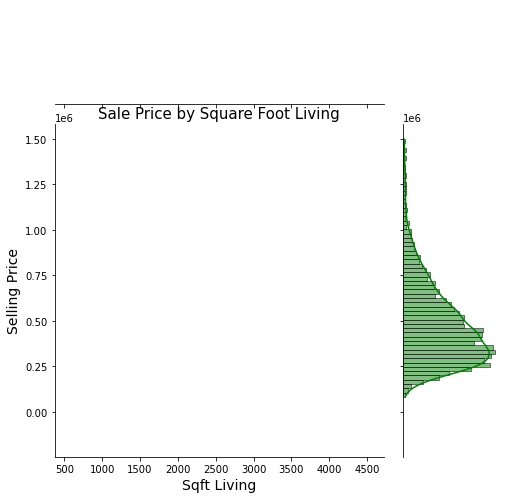

In [109]:
sns.jointplot(x = 'sqft_living', y = 'price' , data = dataset, kind = 'reg', height = 7, xlim = (370, 4720), 
              color = 'g', ratio = 3)

plt.title('Sale Price by Square Foot Living', fontsize = 15)
plt.ylabel('Selling Price', fontsize = 14)
plt.xlabel('Sqft Living', fontsize = 14)
plt.show()

In [110]:
outcome = "price"
x_columns = ['sqft_living']

In [111]:
predictors = '+'.join(x_columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     6823.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:53:29   Log-Likelihood:            -1.8531e+05
No. Observations:               13676   AIC:                         3.706e+05
Df Residuals:                   13674   BIC:                         3.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.039e+06   4.26e+04    -71.285      0.000   -3.12e+06   -2.96e+06
sqft_living  5.028e+06   6.09e+04     82.599      0.000    4.91e+06    5.15e+06
==============================================================================
Omnibus:                     2051.366   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3747.869
Skew:                           0.961   Prob(JB):                         0.00
Kurtosis:                       4.698   Cond. No.                         57.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Answer

The returned results give us a R-Squared value of 0.333 which is ideal. We can see that the bigger the square foot of living the price does tend to increase.


# QUESTION 2

# Will the number of bedrooms increse the price of the houses?

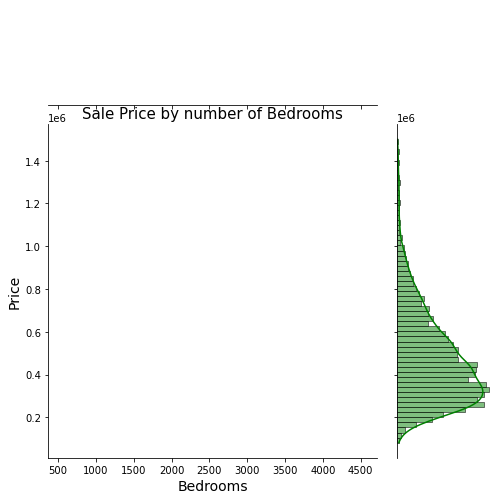

In [112]:
sns.jointplot(x = 'bedrooms', y = 'price' , data = dataset, kind = 'reg', height = 7, xlim = (370, 4720), 
              color = 'g', ratio = 3)

plt.title('Sale Price by number of Bedrooms', fontsize = 15)
plt.ylabel('Price', fontsize = 14)
plt.xlabel('Bedrooms', fontsize = 14)
plt.show()

In [1]:
outcome = "price"
x_columns = ['bedrooms']

In [5]:
predictors = '+'.join(x_columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1423.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          2.59e-296
Time:                        11:42:45   Log-Likelihood:            -1.8740e+05
No. Observations:               13676   AIC:                         3.748e+05
Df Residuals:                   13674   BIC:                         3.748e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.067e+05   7474.725     27.655      0.000    1.92e+05    2.21e+05
bedrooms    8.199e+04   2173.559     37.721      0.000    7.77e+04    8.62e+04
==============================================================================
Omnibus:                     2538.888   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4924.019
Skew:                           1.135   Prob(JB):                         0.00
Kurtosis:                       4.867   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Answer

The answers is a surprising no. The number of bedrooms does not have a great impact on the prices of the house. I would have thought the opposite would be true seeing bigger houses which generally cost more do have more bedrooms. Our R-Squared returned a value of 0.094 which is quite low.

# Question 3

# Does the grade of the house ave a significant role in the pricing of the house?

In [1]:
outcome = "price"
x_columns = ['grade']

In [6]:
predictors = '+'.join(x_columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     9169.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:58:40   Log-Likelihood:            -1.8457e+05
No. Observations:               13676   AIC:                         3.691e+05
Df Residuals:                   13674   BIC:                         3.692e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.818e+05   1.12e+04    -51.996      0.000   -6.04e+05    -5.6e+05
grade       1.408e+05   1470.415     95.754      0.000    1.38e+05    1.44e+05
==============================================================================
Omnibus:                     2374.322   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4995.710
Skew:                           1.031   Prob(JB):                         0.00
Kurtosis:                       5.125   Cond. No.                         57.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Answer

As expected the grade does have a significant value and this is seen by the returned R-Squared value of 0.401. This tells us the higher the grade the higher the price of the house will be. This will be a great feature for the final model. 

# Preparing for the modeling

Features with little significance will need to be dropped in order to increase our model accuracy.

In [7]:
dataset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [9]:
dataset.drop(['bedrooms', 'waterfront',
              'floors', 'waterfront', 'view', 
              'condition', 'yr_built', 'yr_renovated', 
              'zipcode', 'lat', 'long'], axis = 1, inplace=True )

In [10]:
dataset.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Test Train Split

In [11]:
y = dataset['price']

features_dataset = dataset.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features_dataset,dataset['price'],test_size=0.2)

In [12]:
dataset_no_price = dataset.drop('price', axis=1)
X = dataset_no_price
vif = [variance_inflation_factor(dataset_no_price.values, i) for i in range(X.shape[1])]
list(zip(dataset_no_price, vif))

[('bathrooms', 21.473094189732134),
 ('sqft_living', 39.478807359551155),
 ('sqft_lot', 5.34412121017553),
 ('grade', 26.20598536345458),
 ('sqft_above', 26.28664800165926),
 ('sqft_living15', 30.88680680449885),
 ('sqft_lot15', 6.235126695782793)]

# Modeling

In [13]:
linreg = sm.OLS(y_train, X_train).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                          1.357e+04
Date:                Tue, 13 Apr 2021   Prob (F-statistic):                        0.00
Time:                        15:14:11   Log-Likelihood:                     -1.4727e+05
No. Observations:               10940   AIC:                                  2.945e+05
Df Residuals:                   10933   BIC:                                  2.946e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms     -2.881e+04   3489.150     -8.256      0.000   -3.56e+04    -2.2e+04
sqft_living     163.0427      4.886     33.367      0.000     153.465     172.621
sqft_lot          0.2004      0.250      0.802      0.423      -0.290       0.690
grade          2.592e+04   1091.517     23.751      0.000    2.38e+04    2.81e+04
sqft_above      -28.2264      4.541     -6.216      0.000     -37.127     -19.325
sqft_living15    50.5614      4.523     11.178      0.000      41.695      59.428
sqft_lot15       -2.4523      0.316     -7.769      0.000      -3.071      -1.834
==============================================================================
Omnibus:                     1857.580   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3924.839
Skew:                           1.008   Prob(JB):                         0.00
Kurtosis:                       5.133   Cond. No.                     4.28e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Summary Of Findings

- The model returned a R-Squared value of 0.897
    - This is a great value as this shows our model is quite accurate and shows that there is a low colinearity between features.
- The model returned a P-Value of 0.00
    - This tells us that our results are not arbitrary
- Some features that would seem 'obvious' do not always return good results when tested. Numbers do not lie so always test them out.


# Validating The Model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features_dataset,dataset['price'],test_size=0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

10940 2736 10940 2736


Using the train test split we will split the training data into 80% and 20% testing data.

# Steps

# Step 1: Run The Model Using The Training Set ONLY.

In [16]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

# Step 2: Calculate The Prediction On The Training Set And On The Testing Set.

In [17]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Step 3: Calculate The Prediction On The Training Set And The Testing Set.

In [18]:
train_res = y_hat_train - y_train
test_res = y_hat_test - y_test

# Step 4: Examine The Mean Squared Error.

In [19]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)       

print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 27069849498.19815
Test Mean Squarred Error: 25776732322.00402


# Step 5: Examine The Residuals.

***Training Set.***

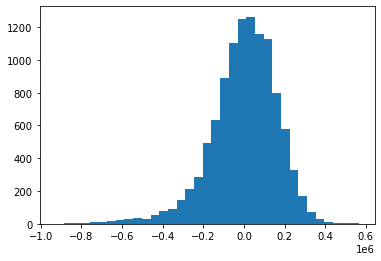

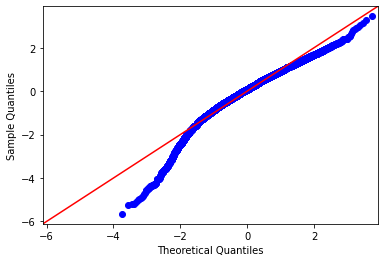

In [20]:
plt.hist(train_res, bins=35)

sm.graphics.qqplot(train_res,dist=stats.norm,line='45',fit=True)

plt.show()

***Test Set.***

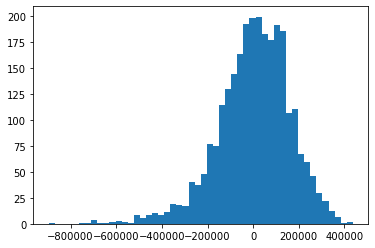

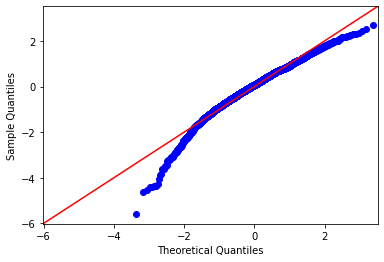

In [21]:
plt.hist(test_res, bins=50)

sm.graphics.qqplot(test_res, dist=stats.norm,line='45', fit=True)

plt.show()

# Recommendations And Comments